In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from arch import arch_model
import statsmodels.api as sm
import matplotlib

# 设置字体为黑体，并解决负号显示问题
matplotlib.rcParams['font.family'] = 'SimHei'
matplotlib.rcParams['axes.unicode_minus'] = False

# 定义文件夹路径
info_folder = 'StockData/market_info'
data_folder = 'StockData/market_data'

# 创建字典存储股票相关信息数据
market_info = {}
# 读取 market_info 中的文件
for year in range(2014, 2025):
    file_name = f'hs300stocks_{year}.csv'
    file_path = os.path.join(info_folder, file_name)
    if os.path.isfile(file_path):
        data = pd.read_csv(file_path)
        market_info[f'year_{year}'] = data
    else:
        print(f'Warning: File {file_path} does not exist.')

# 创建字典存储股票具体数据
market_data = {}
# 读取 market_data 中的文件
for year in range(2014, 2025):
    file_name = f'hs300stocks_kdata_{year}.csv'
    file_path = os.path.join(data_folder, file_name)
    if os.path.isfile(file_path):
        data = pd.read_csv(file_path)
        market_data[f'year_{year}'] = data
    else:
        print(f'Warning: File {file_path} does not exist.')

# 合并所有年份的市场数据为一个数据框
combined_market_data = pd.concat(market_data.values(), ignore_index=True)

In [8]:
import numpy as np
import pandas as pd

# 将time列转换为日期格式
combined_market_data['time'] = pd.to_datetime(combined_market_data['time'], format='%Y/%m/%d %H:%M', errors='coerce')

# 计算每只股票的日收益率
combined_market_data['daily_return'] = combined_market_data.groupby('code')['close'].pct_change()

# 1. 计算波动率（以年化波动率为单位，假设252个交易日）
def calculate_volatility(data):
    return data['daily_return'].std() * np.sqrt(252)

# 2. 计算最大回撤
def calculate_max_drawdown(data):
    data['cumulative_return'] = (1 + data['daily_return']).cumprod()
    data['peak'] = data['cumulative_return'].cummax()
    data['drawdown'] = (data['cumulative_return'] - data['peak']) / data['peak']
    return data['drawdown'].min()

# 3. 计算夏普比率（假设无风险利率为0）
def calculate_sharpe_ratio(data):
    return data['daily_return'].mean() / data['daily_return'].std() * np.sqrt(252)

# 4. 计算VaR（假设99%置信区间）
def calculate_var(data, confidence_level=0.01):
    return np.percentile(data['daily_return'].dropna(), confidence_level * 100)

# 获取市场数据（假设市场代码为"market_index"）
market_data_sample = combined_market_data[combined_market_data['code'] == 'market_index']

# 初始化存储结果的字典
risk_metrics = {}

# 遍历每只股票并计算各项指标
for stock_code in combined_market_data['code'].unique():
    stock_data = combined_market_data[combined_market_data['code'] == stock_code]
    
    volatility = calculate_volatility(stock_data)
    max_drawdown = calculate_max_drawdown(stock_data)
    sharpe_ratio = calculate_sharpe_ratio(stock_data)
    var = calculate_var(stock_data)
    
    risk_metrics[stock_code] = {
        'Volatility': volatility,
        'Max Drawdown': max_drawdown,
        'Sharpe Ratio': sharpe_ratio,
        'VaR': var
    }

# 将结果转化为DataFrame
risk_metrics_df = pd.DataFrame(risk_metrics).T

# 显示结果
print(risk_metrics_df)

C:\Users\13420\AppData\Local\Temp\ipykernel_28576\1209542508.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cumulative_return'] = (1 + data['daily_return']).cumprod()
C:\Users\13420\AppData\Local\Temp\ipykernel_28576\1209542508.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['peak'] = data['cumulative_return'].cummax()
C:\Users\13420\AppData\Local\Temp\ipykernel_28576\1209542508.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

KeyboardInterrupt: 

D:\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.

Epoch 1/100
25/25 [==============================] - 6s 82ms/step - loss: 1.0014 - val_loss: 1.0497
Epoch 2/100
25/25 [==============================] - 1s 45ms/step - loss: 0.9817 - val_loss: 1.0519
Epoch 3/100
25/25 [==============================] - 1s 44ms/step - loss: 0.9846 - val_loss: 1.0559
Epoch 4/100
25/25 [==============================] - 1s 45ms/step - loss: 0.9817 - val_loss: 1.0527
Epoch 5/100
25/25 [==============================] - 1s 45ms/step - loss: 0.9764 - val_loss: 1.0543
Epoch 6/100
25/25 [==============================] - 1s 48ms/step - loss: 0.9721 - val_loss: 1.0565
Epoch 7/100
25/25 [==============================] - 1s 47ms/step - loss: 0.9758 - val_loss: 1.0574
Epoch 8/100
25/25 [==============================] - 1s 48ms/step - loss: 0.9627 - val_loss: 1.0599
Epoch 9/100
25/25 [==============================] - 1s 50ms/step - loss: 0.9599 - val_loss: 1.0736
Epoch 10/100
25/25 [==============================] - 1s 48ms/step - loss: 0.9544 - val_loss: 1.0662

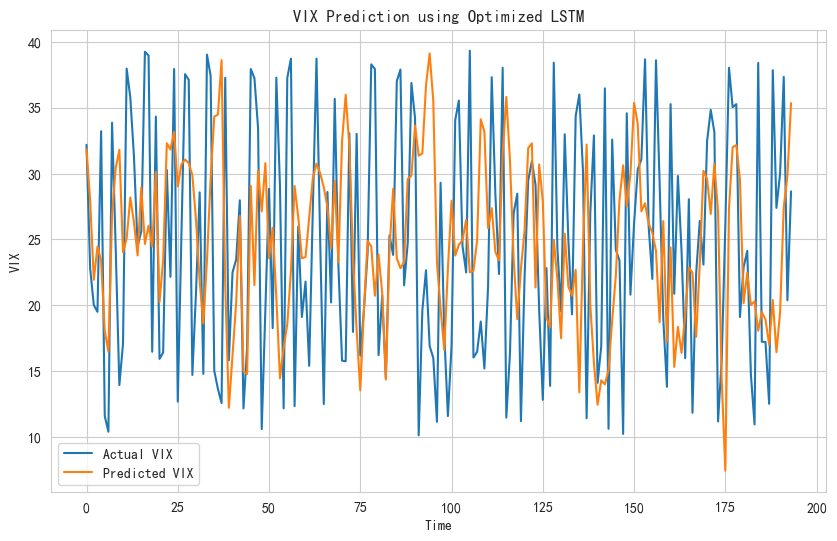

In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 设置字体为黑体，并解决负号显示问题
import matplotlib
matplotlib.rcParams['font.family'] = 'SimHei'
matplotlib.rcParams['axes.unicode_minus'] = False

# 生成随机数据：假设每个特征的范围和标准
np.random.seed(42)
n_samples = 1000  # 假设有1000个样本

# 生成随机的特征值
volatility = np.random.uniform(0.1, 0.5, size=n_samples)
max_drawdown = np.random.uniform(-0.3, 0, size=n_samples)
sharpe_ratio = np.random.uniform(-1, 2, size=n_samples)
beta = np.random.uniform(0, 2, size=n_samples)
VaR = np.random.uniform(-0.05, 0, size=n_samples)
correlation = np.random.uniform(-1, 1, size=n_samples)

# 生成随机目标变量 VIX
VIX = np.random.uniform(10, 40, size=n_samples)

# 合并数据
combined_market_data = pd.DataFrame({
    'volatility': volatility,
    'max_drawdown': max_drawdown,
    'sharpe_ratio': sharpe_ratio,
    'beta': beta,
    'VaR': VaR,
    'correlation': correlation,
    'VIX': VIX
})

# 选择特征和目标
features = ['volatility', 'max_drawdown', 'sharpe_ratio', 'beta', 'VaR', 'correlation']
target = 'VIX'
X = combined_market_data[features]
y = combined_market_data[target]

# 标准化特征和目标变量
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()  # 将y进行标准化

# 创建序列数据
def create_sequences(data, target_data, time_step=30):
    X_seq, y_seq = [], []
    for i in range(len(data) - time_step):
        X_seq.append(data[i:i+time_step])
        y_seq.append(target_data[i+time_step])
    return np.array(X_seq), np.array(y_seq)

time_step = 30
X_seq, y_seq = create_sequences(pd.DataFrame(X_scaled), y_scaled, time_step)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# 构建优化后的LSTM模型
model = Sequential()
model.add(LSTM(units=256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=1))

# 编译模型，设置较小的学习率
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')

# 训练模型
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# 预测结果并反标准化
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)  # 反标准化
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # 反标准化

# 评估模型
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual VIX')
plt.plot(y_pred, label='Predicted VIX')
plt.legend()
plt.title('VIX Prediction using Optimized LSTM')
plt.xlabel('Time')
plt.ylabel('VIX')
plt.show()